<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%EC%97%AC%EC%A7%84%EC%98%81/%EC%82%BC%EC%84%B1_%EC%8B%A4%EC%8A%B5_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/삼성_실습_2일차

[Errno 2] No such file or directory: 'drive/MyDrive/삼성_실습_2일차'
/content


In [ ]:
!pip install torch transformers pandas

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# HuggingFace Transformer 라이브러리 사용하기

- Transformer 라이브러리 사용법을 익히고, 여러 NLP task를 알아보자.

```
- feature-extraction
- fill-mask
- named entity recognition
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification
```



### Feature Extraction
- 텍스트의 vector representation을 추출하는 task
- 만약 영어 문법 책을 학습한 모델이라면, Input 문장에서 문법적 특징을 더 잘 반영하는 vector를 추출한다.

In [ ]:
from transformers import pipeline

feature_extractor = pipeline("feature-extraction")
feature_extractor("Transformers is an awesome library!", return_tensors = "pt")

No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


tensor([[[ 4.3926e-01,  2.2207e-01, -5.0300e-02,  ...,  2.4600e-02,
           1.3901e-01,  1.4254e-01],
         [ 7.3819e-02,  2.9160e-01, -1.3167e-01,  ...,  2.0934e-01,
           8.7077e-02,  1.9686e-01],
         [ 2.4305e-01,  3.7178e-01,  9.5156e-04,  ...,  2.9249e-01,
           3.6321e-02,  7.8655e-02],
         ...,
         [ 3.1995e-01,  5.6685e-02, -1.8184e-01,  ...,  8.3143e-02,
          -1.9785e-01,  3.6804e-01],
         [ 2.9897e-01,  2.7123e-01,  3.0696e-01,  ...,  3.0592e-01,
          -3.8431e-03,  2.7595e-01],
         [ 9.7364e-01,  8.1703e-01,  1.3030e-01,  ...,  2.0169e-01,
           6.2248e-01,  5.3565e-01]]])

### Sentimental Analysis
- 문장의 긍정/부정을 판단하는
- 영화 리뷰에 대한 감정 분류 (추후 실습 예정)

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

### Text Generation
- Input 문장의 다음에 올 텍스트를 생성하는 task

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to perform the basic tasks needed to successfully create a new "personal" website. As you use our online tools I strongly recommend this course.\n\n\nPart Two: Web Design\n\n\nTo help you be'}]

### Mask Filling
- 문장 내 <mask> 토큰에 올 텍스트를 예측하는 task
- 오늘 실습할 BERT가 동일한 방법으로 학습을 진행하였음

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.19619743525981903,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052703455090523,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

### Named Entity Recognition
- 개체명을 인식(=어떤 범주에 포함되는지)하는 task

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Namyoung and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTrainin

[{'entity_group': 'ORG',
  'score': 0.73261404,
  'word': 'Namyoung',
  'start': 0,
  'end': 8},
 {'entity_group': 'LOC',
  'score': 0.9552846,
  'word': 'Namyoung',
  'start': 15,
  'end': 23}]

### Question Answering
- Context를 주고, 질문을 했을 때 적절한 대답을 생성하는 task

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6949753165245056, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

### Zero-shot classification
- 학습 중에 본 적이 없는 클래스에 대해 분류를 수행하는 task

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public model

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445993661880493, 0.1119738519191742, 0.04342673718929291]}

- Summarization, Translation은 아래에서 수행

### MarianMT Model을 활용한 한국어-영어 번역기

- 번역 task를 수행하기 위해 학습된 모델을 직접 불러오자
- 사실, pipeline() 안에는 데이터 전처리 - 모델 통과 - 데이터 후처리 과정이 포함되어 있다.

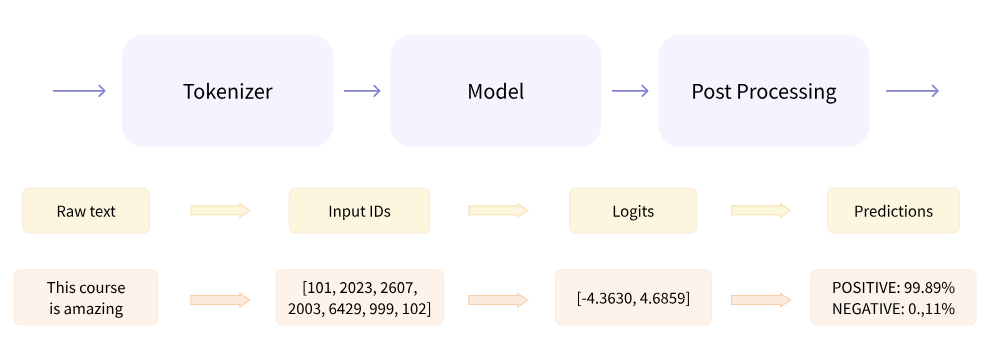

Tokenize - 입력된 텍스트를 모델에서 처리할 수 있는 데이터로 변환하는 것

In [ ]:
import torch
from transformers import MarianMTModel, MarianTokenizer

# Pretrained 모델과 토크나이저 로드 (한국어 -> 영어)
model_name = 'Helsinki-NLP/opus-mt-ko-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# 입력 문장
input_text = "안녕하세요, 자연어 처리의 Transformer 모델을 실습해보겠습니다."

# 번역
input_ids = tokenizer(input_text, return_tensors="pt").input_ids # 데이터 전처리
outputs = model.generate(input_ids) # 모델 통과
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True) # 데이터 후처리

print("Input:", input_text)
print("Translated:", translated_text)


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


tensor([[65000,  3680,     3,    16,    12,   107,   220,     5,  1563,     4,
         27110, 17682,   360,  4996,     6,  1915,  1368, 26471,     2,     0]])
Input: 안녕하세요, 자연어 처리의 Transformer 모델을 실습해보겠습니다.
Translated: Hi, I'm going to run the Transformer model of natural language processing.


### T5 Model을 활용한 문서 요약기
- Summarizer 만들기 실습

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "lcw99/t5-base-korean-text-summary"
tokenizer = ### Tokenizer 선언 (AutoTokenizer 사용) ###
model = ### model 선언 (AutoModelForSeq2SeqLM 사용) ###

text = """
요약을 원하는 텍스트 작성
"""

inputs = ["summarize: " + text]

#### tokenizer() - Input data 전처리 ####
1.
#### model의 generate() - Input data 모델 통과 ####
#### argument로 min_length=10, max_length=100 추가 ####
2.
#### tokenizer.decode() - 최종 output 생성 ####
3.

print(summarized_text)

### T5 Model을 활용한 문서 요약기 (정답)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "lcw99/t5-base-korean-text-summary"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

text = """
백정현(37·삼성 라이온즈)은 23일 대구 삼성라이온즈파크에서 열린 두산 베어스와의 더블헤더 2차전에 선발로 등판해 5이닝 7안타(2홈런) 2볼넷 3탈삼진 3실점을 기록했다.
올 시즌 삼성 선발 한 축을 지킬 것으로 기대를 모았지만, 종아리 부상으로 휴식 및 재활 기간을 가졌다.
84일 만에 1군 마운드 복귀전은 성공적이었다. 두산과의 더블헤더 2차전에 선발로 나온 백정현은 직구 최고 구속은 142㎞가 기록했고, 슬라이더(25개) 체인지업(23개) 커브(11개) 싱커(2개)를 섞어 경기를 풀어갔다. 구위로 압도하는 모습은 아니었지만, 노련하게 경기를 풀어갔다.
"""

inputs = ["summarize: " + text]

input_ids = tokenizer(inputs, return_tensors="pt").input_ids
output = model.generate(input_ids, min_length=10, max_length=100)
summarized_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(summarized_text)

tokenizer_config.json:   0%|          | 0.00/2.39k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

백 씨는 두산과의 더블헤더 2차전에 선발로 등판해 5이닝 7안타 2볼넷 3탈삼진 3실점을 기록했다.


# BERT의 토크나이저 이해하기
- Tokenize - 입력된 텍스트를 모델에서 처리할 수 있는 데이터로 변환하는 것
- BERT는 WordPiece tokenizing 방식을 사용

In [ ]:
import pandas as pd
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Bert-base의 토크나이저

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
result = tokenizer.tokenize('Here is the sentence I want embeddings for.')
print(result)

['here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.']


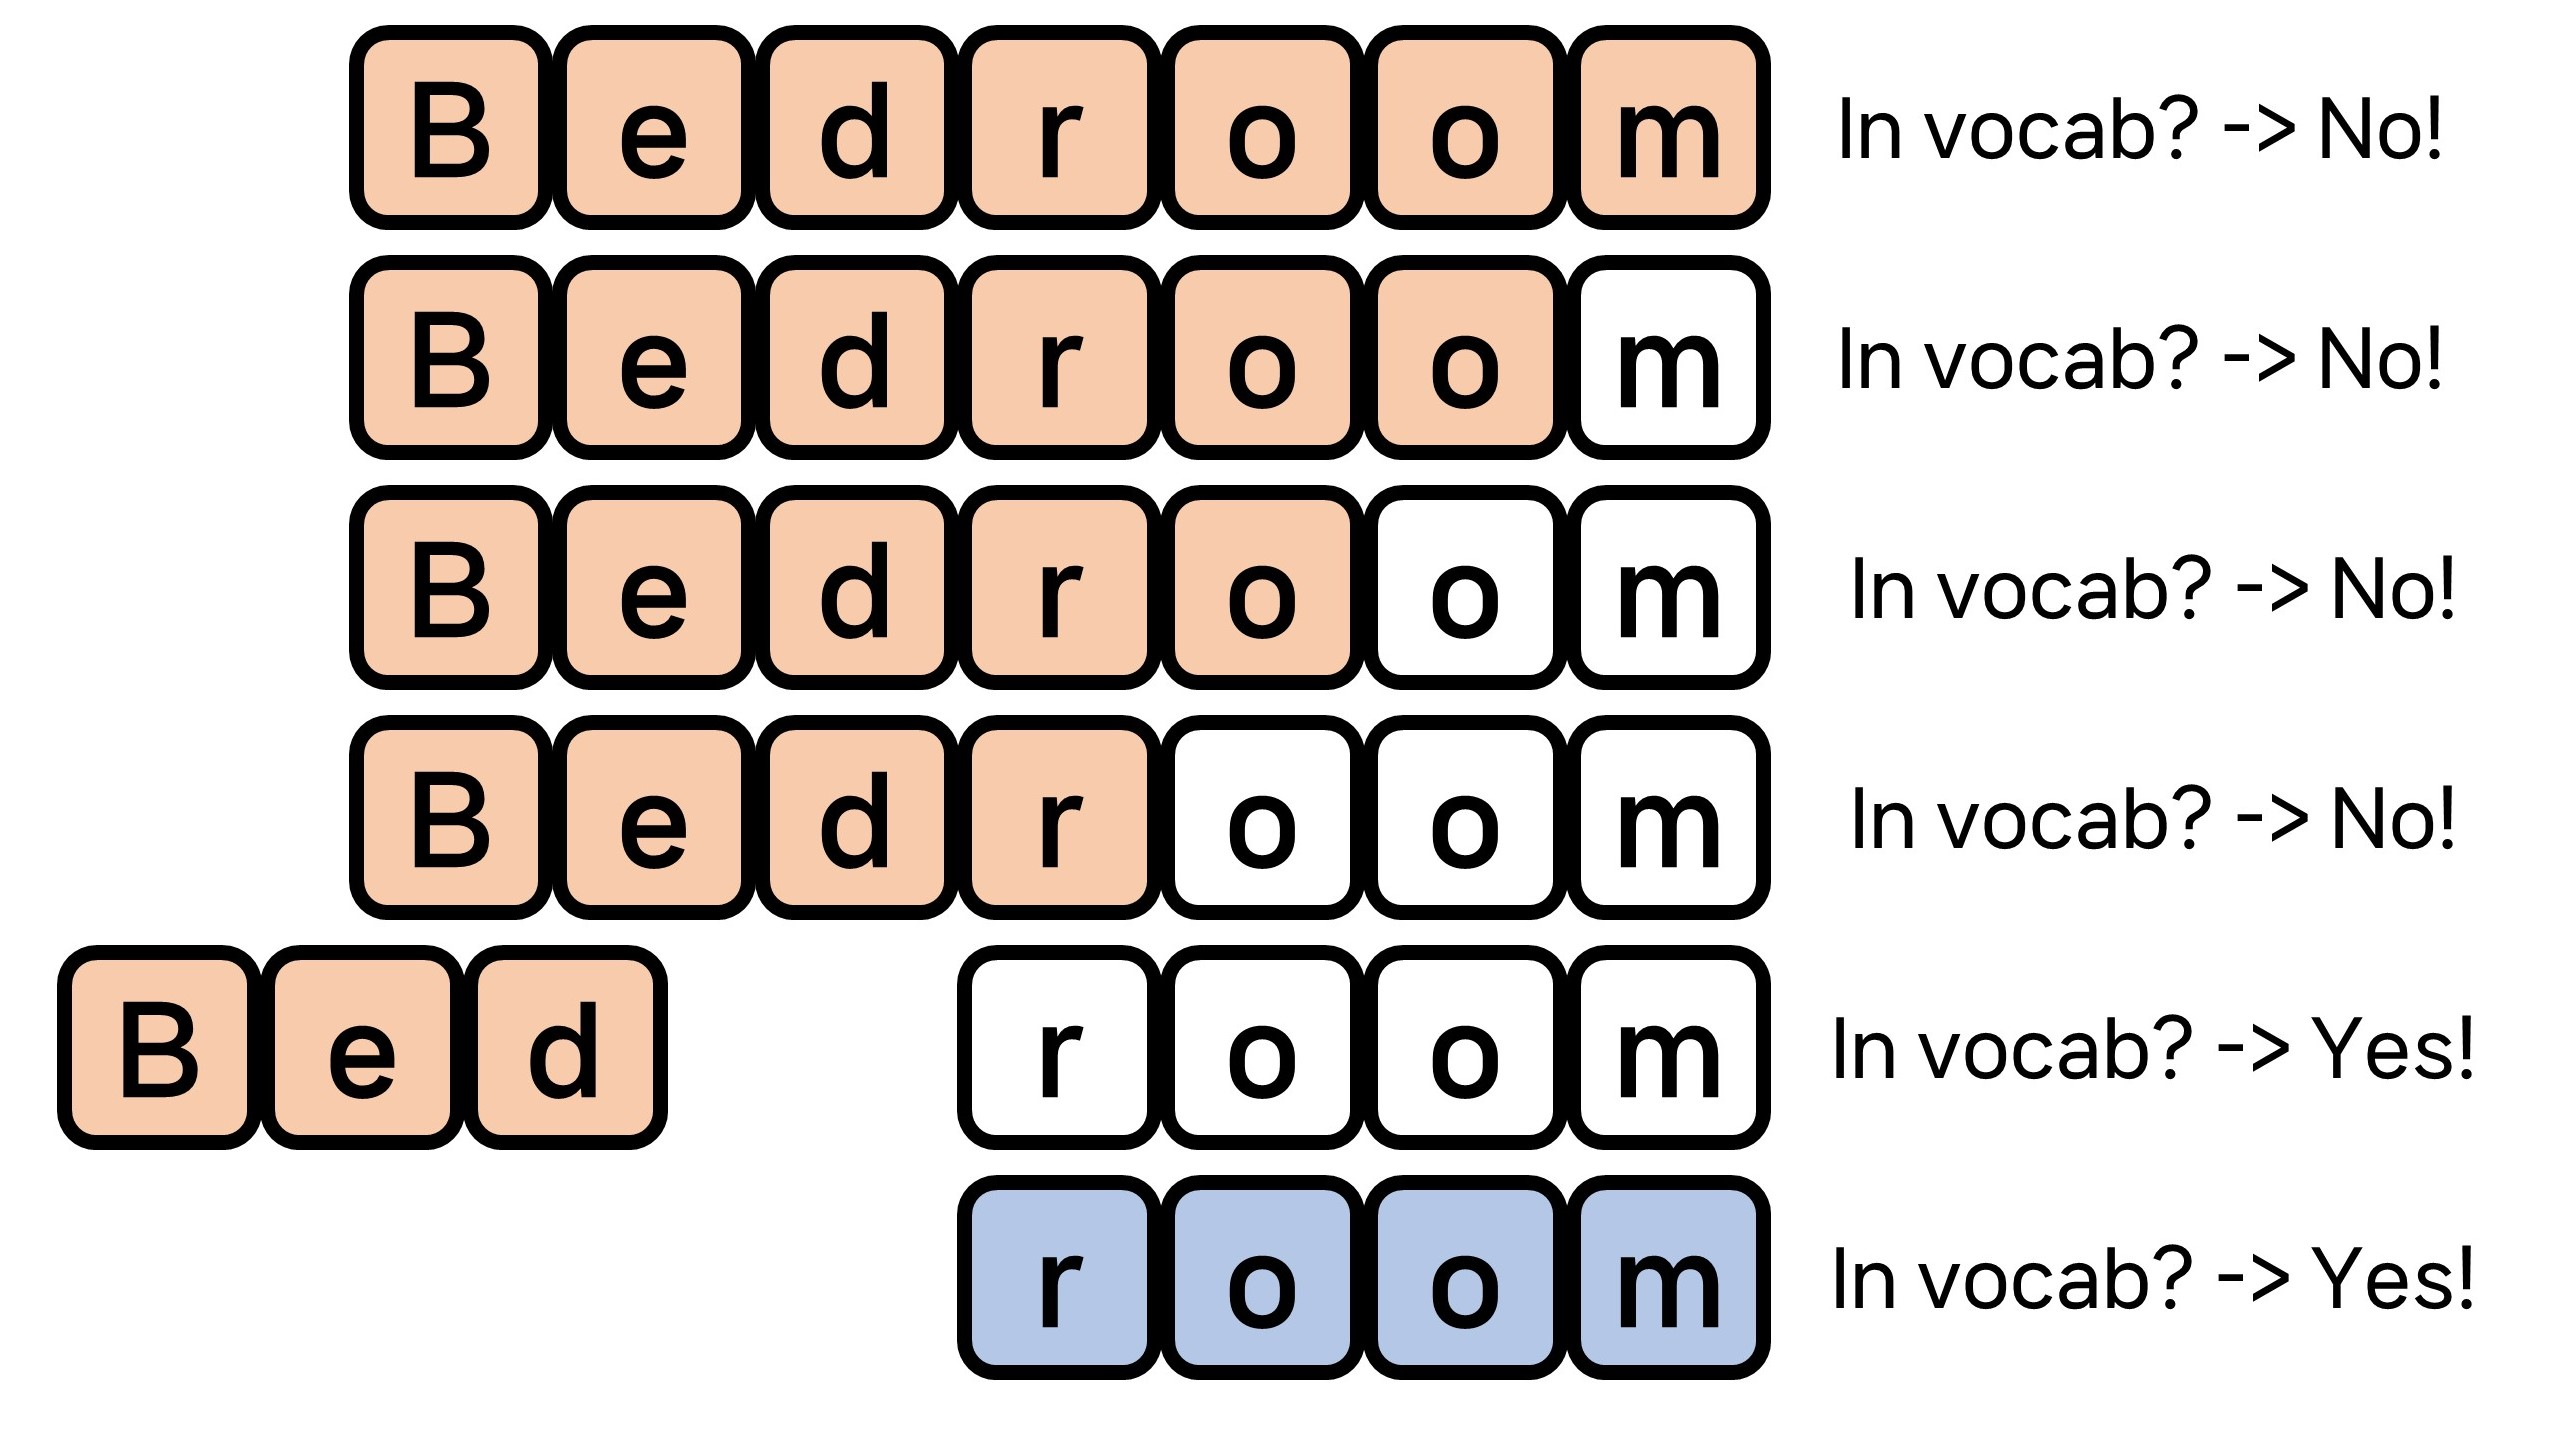

In [ ]:
print(tokenizer.vocab['here'])

2182


In [ ]:
print(tokenizer.vocab['embeddings'])

KeyError: 'embeddings'

In [ ]:
print(tokenizer.vocab['em'])

7861


In [ ]:
print(tokenizer.vocab['##bed'])

8270


In [ ]:
print(tokenizer.vocab['##ding'])

4667


In [ ]:
print(tokenizer.vocab['##s'])

2015


# Masked 언어 모델링 알아보기

In [ ]:
from transformers import TFBertForMaskedLM
from transformers import AutoTokenizer

In [ ]:
model = TFBertForMaskedLM.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForMaskedLM.

All the weights of TFBertForMaskedLM were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForMaskedLM for predictions without further training.


In [ ]:
inputs = tokenizer('Samsung is [MASK] company.', return_tensors='tf')

### 정수 인코딩 결과
[PAD] - 0, [UNK] - 100, [CLS] - 101, [SEP] - 102, [MASK] - 103

In [ ]:
print(inputs['input_ids'])
print(tokenizer.decode(inputs['input_ids'][0]))

tf.Tensor([[  101 19102  2003   103  2194  1012   102]], shape=(1, 7), dtype=int32)
[CLS] samsung is [MASK] company. [SEP]


### Segment 인코딩 결과
- 입력이 두 문장이라면 두 번째 문장은 1의 값을 가집니다.

In [ ]:
print(inputs['token_type_ids'])

tf.Tensor([[0 0 0 0 0 0 0]], shape=(1, 7), dtype=int32)


In [ ]:
inputs = tokenizer('Samsung is [MASK] company.', 'I love Samsung', padding=True, return_tensors='tf')
print(inputs['token_type_ids'])

tf.Tensor([[0 0 0 0 0 0 0 1 1 1 1]], shape=(1, 11), dtype=int32)


### Attention mask 결과
- <PAD> 토큰이 아니라면 모두 1의 값을 가집니다.
- 즉, Attention mask란 학습되지 않는 <PAD> 토큰을 구분하는 용도

In [ ]:
print(inputs['attention_mask'])

tf.Tensor([[1 1 1 1 1 1 1 1 1 1 1]], shape=(1, 11), dtype=int32)


In [ ]:
inputs = tokenizer(['Samsung is [MASK] company.', 'I love Samsung'], padding=True, return_tensors='tf')
print(inputs['input_ids'])
print(inputs['attention_mask'])

tf.Tensor(
[[  101 19102  2003   103  2194  1012   102]
 [  101  1045  2293 19102   102     0     0]], shape=(2, 7), dtype=int32)
tf.Tensor(
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0]], shape=(2, 7), dtype=int32)


### [MASK] 토큰 예측

In [ ]:
from transformers import FillMaskPipeline
fill_mask = FillMaskPipeline(model=model, tokenizer=tokenizer)

In [ ]:
fill_mask('Samsung is a [MASK] company in korea.')

[{'score': 0.2192261964082718,
  'token': 12108,
  'token_str': 'telecommunications',
  'sequence': 'samsung is a telecommunications company in korea.'},
 {'score': 0.05982118844985962,
  'token': 20681,
  'token_str': 'semiconductor',
  'sequence': 'samsung is a semiconductor company in korea.'},
 {'score': 0.047415196895599365,
  'token': 7829,
  'token_str': 'shipping',
  'sequence': 'samsung is a shipping company in korea.'},
 {'score': 0.04292672127485275,
  'token': 20584,
  'token_str': 'multinational',
  'sequence': 'samsung is a multinational company in korea.'},
 {'score': 0.03434177115559578,
  'token': 2865,
  'token_str': 'media',
  'sequence': 'samsung is a media company in korea.'}]

- 정리 : BERT는 [MASK] Token을 예측하는 방식으로 학습되었다.

# Next Sentence Prediction 알아보기

In [ ]:
from transformers import BertForNextSentencePrediction
from transformers import AutoTokenizer
import torch
import torch.nn.functional as F

In [ ]:
model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
prompt = "I love Samsung"
next_sentence = "Samsung is a good company in korea"

In [ ]:
encoding = tokenizer(prompt, next_sentence, return_tensors='pt')

### 정수 인코딩 결과
- [SEP] 102 토큰으로 문장을 구분

In [ ]:
print(encoding['input_ids'])

tensor([[  101,  1045,  2293, 19102,   102, 19102,  2003,  1037,  2204,  2194,
          1999,  4420,   102]])


In [ ]:
print(tokenizer.decode(encoding['input_ids'][0]))

[CLS] i love samsung [SEP] samsung is a good company in korea [SEP]


### Segment 인코딩 결과
- 두 번째 문장은 1의 값을 가진다.

In [ ]:
print(encoding['token_type_ids'])

tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])


- BERT가 다음 문장 예측을 학습했을 당시에 실질적으로 이어지는 두 개의 문장의 레이블은 0.
- 이어지지 않는 두 개의 문장의 경우에는 레이블을 1로 두고서 이진 분류로 학습
- 즉, index 0번의 값이 클수록 BERT가 이어지는 문장으로 판단한 것

In [ ]:
# 모델 출력 (logits) 얻기
logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids']).logits

# 소프트맥스 확률 계산
probs = F.softmax(logits, dim=-1)

# 출력
print(probs)

tensor([[9.9999e-01, 6.0765e-06]], grad_fn=<SoftmaxBackward0>)


- 만약 연관 없는 두 문장을 입력으로 준다면?

In [ ]:
prompt = "Samsung is a good company in korea"
next_sentence = "I'm a student"

encoding = tokenizer(prompt, next_sentence, return_tensors='pt')
logits = model(encoding['input_ids'], token_type_ids=encoding['token_type_ids']).logits
probs = F.softmax(logits, dim=-1)
print(probs)

tensor([[0.0991, 0.9009]], grad_fn=<SoftmaxBackward0>)


정리 : BERT는 Next Sentence Prediction을 통해 학습되었다

# BERT 네이버 영화 리뷰 감성 분석 실습

In [ ]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import numpy as np

### 네이버 영화리뷰 감정분석 데이터 다운로드

In [ ]:
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Counting objects: 100% (14762/14762), done.
remote: Compressing objects: 100% (13012/13012), done.
remote: Total 14763 (delta 1748), reused 14762 (delta 1748), pack-reused 1
Receiving objects: 100% (14763/14763), 56.19 MiB | 13.09 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (14737/14737), done.


### Pandas로 training data와 test data 로드

In [ ]:
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

train = train[:1500]
test = test[:500]
train.head(10)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


### document와 label 분리 (데이터 전처리)

In [ ]:
train_document = [str(sentence) for sentence in train['document']]
train_label = [label for label in train['label']]
test_document = [str(sentence) for sentence in test['document']]
test_label = [label for label in test['label']]

print(train_document[:10])
print(train_label[:10])

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '원작의 긴장감을 제대로 살려내지못했다.', '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네', '액션이 없는데도 재미 있는 몇안되는 영화', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']
[0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


### BERT Tokenizer를 사용하여 데이터 전처리

In [ ]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('distilbert/distilbert-base-multilingual-cased', do_lower_case=False)
train_tokens = tokenizer(train_document, padding=True, truncation=True, return_tensors="pt")
test_tokens = tokenizer(test_document, padding=True, truncation=True, return_tensors="pt")

# print(sentences[0])
print(train_tokens['input_ids'][0])
print(tokenizer.decode(train_tokens['input_ids'][0]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


tensor([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,   9715,
        119230,  16439,  77884,  48549,   9284,  22333,  12692,    102,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0, 

### Transformers의 Dataset, DataLoader 사용

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_tokens, train_label)
test_dataset = ReviewDataset(test_tokens, test_label)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Model import (distilbert)

In [ ]:
model = BertForSequenceClassification.from_pretrained('distilbert/distilbert-base-multilingual-cased', num_labels=2)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder

### 학습 전 성능 체크

In [ ]:
from transformers import pipeline

nsmc_classifier = pipeline('sentiment-analysis',
                           model=model.cpu(), tokenizer=tokenizer, framework='pt')
id2label = {"LABEL_0": "negative", "LABEL_1": "positive"}

reviews= [
          "생각한 것보다는 영화가 재미없었어",
          "역시 재밌네ㅋㅋ 최고",
          "재밌긴한데, 재미없는 것 같기도 해"
]

results = nsmc_classifier(reviews)
for idx, result in enumerate(results):
    print(reviews[idx])
    for k, v in result.items():
        print(f" >> {k} : {id2label[v] if k == 'label' else v}")
    print()

# nsmc_classifier.save_pretrained('./pipeline')

생각한 것보다는 영화가 재미없었어
 >> label : negative
 >> score : 0.6117075085639954

역시 재밌네ㅋㅋ 최고
 >> label : negative
 >> score : 0.6187258362770081

재밌긴한데, 재미없는 것 같기도 해
 >> label : negative
 >> score : 0.5896890759468079



### Fine-tuning 진행

In [ ]:
from tqdm.auto import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 3
learning_rate = 2e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
model.to(device) # GPU 사용이 가능한 경우

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Average Loss: {average_loss:.4f}")

  0%|          | 0/94 [00:00<?, ?it/s]

<ipython-input-6-f9f5d8975545>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


### Fine-tuning 후 Test

In [ ]:
model.eval()
correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted_labels = torch.max(outputs.logits, dim=1)

        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)

accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy:.4f}")

<ipython-input-86-8763bfe6f115>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 0.7020


### Fine-tuning 모델 성능 확인

In [ ]:
from transformers import pipeline

nsmc_classifier = pipeline('sentiment-analysis',
                           model=model.cpu(), tokenizer=tokenizer, framework='pt')
id2label = {"LABEL_0": "negative", "LABEL_1": "positive"}

reviews= [
          "생각한 것보다는 영화가 재미없었어",
          "역시 재밌네ㅋㅋ 최고",
          "재밌긴한데, 재미없는 것 같기도 해"
]

results = nsmc_classifier(reviews)
for idx, result in enumerate(results):
    print(reviews[idx])
    for k, v in result.items():
        print(f" >> {k} : {id2label[v] if k == 'label' else v}")
    print()

# nsmc_classifier.save_pretrained('./pipeline')

생각한 것보다는 영화가 재미없었어
 >> label : positive
 >> score : 0.5800752639770508

역시 재밌네ㅋㅋ 최고
 >> label : positive
 >> score : 0.6163285970687866

재밌긴한데, 재미없는 것 같기도 해
 >> label : positive
 >> score : 0.6003748178482056



### Fine-tuned model 사용하여 Sentiment Analysis pipline 구축
- sangrimlee/bert-base-multilingual-cased-nsmc
- 위 모델 명 사용하여 pipeline 구축 (단 2줄)
- 위 테스트 했던 리뷰 문장 테스트 해보기 (Inference)

In [ ]:
from transformers import pipeline

### pipeline 구축 ###

### Inference ###


### Fine-tuned model 사용하여 Sentiment Analysis pipline 구축 (정답)

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="sangrimlee/bert-base-multilingual-cased-nsmc")

classifier("재밌긴한데, 재미없는 것 같기도 해")

[{'label': 'negative', 'score': 0.9637648463249207}]

# 한국어 감정 분석 실습 (다중 분류)

In [ ]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

### 한국어 감정 분석 데이터 전처리

In [ ]:
data = pd.read_excel('./data.xlsx') ## pd.read_json 이용

data=data.iloc[:,:2]
data.head(10)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
5,남자친구가 떠날까봐요,공포
6,이거 했는데 허리가 아플수도 있나요? ;;,공포
7,내가불안해서꾸는걸까..,공포
8,일주일도 안 남았당...ㅠㅠ,공포
9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,공포


- 직접 tokenize 함수를 사용해서 데이터 전처리 해보기

In [ ]:
data.loc[(data['Emotion'] == "공포"), 'Emotion'] = 0  #공포 => 0
data.loc[(data['Emotion'] == "놀람"), 'Emotion'] = 1  #놀람 => 1
data.loc[(data['Emotion'] == "분노"), 'Emotion'] = 2  #분노 => 2
data.loc[(data['Emotion'] == "슬픔"), 'Emotion'] = 3  #슬픔 => 3
data.loc[(data['Emotion'] == "중립"), 'Emotion'] = 4  #중립 => 4
data.loc[(data['Emotion'] == "행복"), 'Emotion'] = 5  #행복 => 5
data.loc[(data['Emotion'] == "혐오"), 'Emotion'] = 6  #혐오 => 6

data_sentence = ### 직접 작성 ###
data_label = ### 직접 작성 ###

x_train, x_test, y_train, y_test = train_test_split(data_sentence, data_label, test_size=0.2, shuffle=True)
print(x_train[:10])
print(y_train[:10])

x_train = x_train[:1500]
y_train = y_train[:1500]
x_test = x_test[:500]
y_test = y_test[:500]

In [ ]:
# BERT('klue/bert-base')의 토크나이저로 문장을 토큰으로 분리
tokenizer = ### 직접 작성 ###
train_tokens = ### 직접 작성 ###
test_tokens = ### 직접 작성 ###

# print(sentences[0])
print(train_tokens['input_ids'][0])
print(tokenizer.decode(train_tokens['input_ids'][0]))

tensor([    2, 23811,  2124,  2119,  7365, 12933,  8084,  2530,     3,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0])
[CLS] 정윤회도 철저히조사해야함 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_tokens, y_train)
test_dataset = ReviewDataset(test_tokens, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

- 'klue/bert-base' 모델 불러오기

In [ ]:
model = ### 직접 작성 ###

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tqdm.auto import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 3
learning_rate = 2e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
model.to(device) # GPU 사용이 가능한 경우

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Average Loss: {average_loss:.4f}")

  0%|          | 0/47 [00:00<?, ?it/s]

<ipython-input-30-c6f2dd9540e5>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 1/3 - Average Loss: 1.6956


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch 2/3 - Average Loss: 1.2321


  0%|          | 0/47 [00:00<?, ?it/s]

Epoch 3/3 - Average Loss: 0.9461


In [ ]:
model.eval()
correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted_labels = torch.max(outputs.logits, dim=1)

        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)

accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy:.4f}")

<ipython-input-30-c6f2dd9540e5>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 0.5320


In [ ]:
from transformers import pipeline

sentiment_classifier = ### 직접 작성 ###

id2label = {
    "LABEL_0": "공포",
    "LABEL_1": "놀람",
    "LABEL_2": "분노",
    "LABEL_3": "슬픔",
    "LABEL_4": "중립",
    "LABEL_5": "행복",
    "LABEL_6": "혐오"
    }

sentence = ### 직접 작성 ###

result = ### 직접 작성 ###
print(result)

print(f"{id2label[result[0]['label']]}")

# sentiment_classifier.save_pretrained('./pipeline')

[{'label': 'LABEL_5', 'score': 0.9143592715263367}]
행복


# 한국어 감정 분석 실습 (다중 분류) 정답

In [ ]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import json
import pandas as pd
import numpy as np

data = pd.read_excel('./data.xlsx') ## pd.read_json 이용

data=data.iloc[:,:2]
data.head(10)

data.loc[(data['Emotion'] == "공포"), 'Emotion'] = 0  #공포 => 0
data.loc[(data['Emotion'] == "놀람"), 'Emotion'] = 1  #놀람 => 1
data.loc[(data['Emotion'] == "분노"), 'Emotion'] = 2  #분노 => 2
data.loc[(data['Emotion'] == "슬픔"), 'Emotion'] = 3  #슬픔 => 3
data.loc[(data['Emotion'] == "중립"), 'Emotion'] = 4  #중립 => 4
data.loc[(data['Emotion'] == "행복"), 'Emotion'] = 5  #행복 => 5
data.loc[(data['Emotion'] == "혐오"), 'Emotion'] = 6  #혐오 => 6

data_sentence = [str(sentence) for sentence in data['Sentence']]
data_label = [label for label in data['Emotion']]

x_train, x_test, y_train, y_test = train_test_split(data_sentence, data_label, test_size=0.2, shuffle=True)
print(x_train[:10])
print(y_train[:10])

x_train = x_train[:1500]
y_train = y_train[:1500]
x_test = x_test[:500]
y_test = y_test[:500]

# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('klue/bert-base', do_lower_case=False)
train_tokens = tokenizer(x_train, padding=True, truncation=True, return_tensors="pt")
test_tokens = tokenizer(x_test, padding=True, truncation=True, return_tensors="pt")

# print(sentences[0])
print(train_tokens['input_ids'][0])
print(tokenizer.decode(train_tokens['input_ids'][0]))

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_tokens, y_train)
test_dataset = ReviewDataset(test_tokens, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = BertForSequenceClassification.from_pretrained('klue/bert-base', num_labels=7)

from tqdm.auto import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 3
learning_rate = 2e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
model.to(device) # GPU 사용이 가능한 경우

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Average Loss: {average_loss:.4f}")

model.eval()
correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted_labels = torch.max(outputs.logits, dim=1)

        correct_predictions += torch.sum(predicted_labels == labels).item()
        total_predictions += labels.size(0)

accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy:.4f}")

from transformers import pipeline

sentiment_classifier = pipeline('sentiment-analysis',
                           model=model.cpu(), tokenizer=tokenizer, framework='pt')
id2label = {
    "LABEL_0": "공포",
    "LABEL_1": "놀람",
    "LABEL_2": "분노",
    "LABEL_3": "슬픔",
    "LABEL_4": "중립",
    "LABEL_5": "행복",
    "LABEL_6": "혐오"
    }

sentence = ['나 너무 행복해']

result = sentiment_classifier(sentence)
print(result)

print(f"{id2label[result[0]['label']]}")

# sentiment_classifier.save_pretrained('./pipeline')

# BERT 기반 한국어 감정 분류모델
- hun3359/klue-bert-base-sentiment
- 위 모델 명 사용하여 pipeline 구축 (단 2줄)
- Inference 해보기

In [ ]:
from transformers import pipeline

### pipeline 구축 ###

### Inference ###


# BERT 기반 한국어 감정 분류모델 (정답)

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="hun3359/klue-bert-base-sentiment")

classifier("오늘 밥이 너무 맛있었어. 행복해")

[{'label': '만족스러운', 'score': 0.3891879916191101}]